In [1]:
function [peak_diffs, trough_diffs] = hysteresis_diffs(low, high, data)
    max_left_bounds = [];
    max_right_bounds = [];
    
    % find the left and right bounds of the local maximum for each peak
    found_max = 0;
    for i=1:length(data)
        if (!found_max && data(i) > high)
            found_max = 1;
            max_left_bounds(end+1) = i;
        elseif (found_max && data(i) < low)
            found_max = 0;
            max_right_bounds(end+1) = i;
        end
    end
    if (found_max)
            max_right_bounds(end+1) = length(data);
    end
    
    % find the location of maxima for each peak and compute the differences between them
    peaks = [];
    for i=1:length(max_left_bounds)
        [_, peaks(i)] = max(data(max_left_bounds(i):max_right_bounds(i)));
        peaks(i) += max_left_bounds(i)-1;
    end
    
    % find the location of minima for each trough and compute the differences between them
    troughs = [];
    for i=1:length(max_left_bounds)-1
        [_, troughs(i)] = min(data(max_right_bounds(i):max_left_bounds(i+1)));
        troughs(i) += max_right_bounds(i)-1;
    end
    
    peak_diffs = diff(peaks);
    trough_diffs = diff(troughs);
end

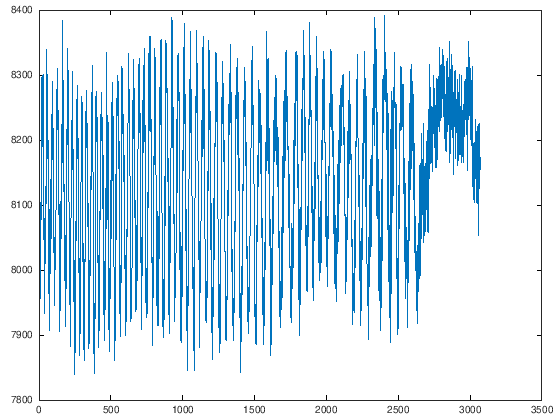

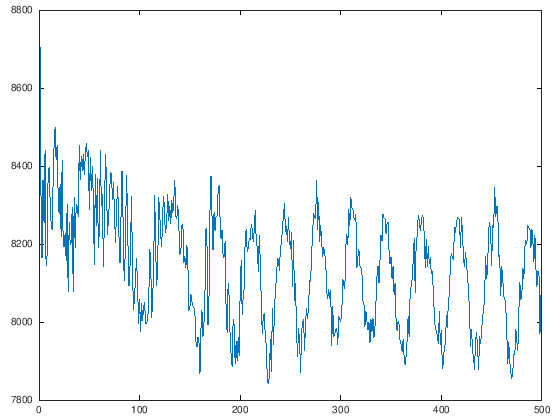

In [14]:
data = csvread('test_data-2019-01-30/2019-01-30-HeNe-vacuum-120-best');
figure(1)
plot(data(1:500))
figure(2)
plot(data(501:end))

In [18]:

2300/12000
19000-4000*ans

ans =  0.19167
ans =    1.8233e+04


In [ ]:
M=csvread('test_data-2019-01-23/2019-01-23-sodium-coherence-0.72-0.001');
plot(M)
N=(M(1000:42000));
P=N-mean(N);
% Y=(abs(fft(P)));
Y=fft(P);
% plot(Y)
L = 41000;             % Length of signal
P2 = abs(Y/L);
P1 = P2(1:L/2+1);
P1(2:end-1) = 2*P1(2:end-1);
Fs = 30; %sampling frequency
f = Fs*(0:(L/2))/L;
f = f./sum(f);
plot(f,P1) 
title('Sodium fourier data');
xlabel('Digital spatial frequency component');
ylabel('Magnitude of frequency component');
xlim([2 4])